In [1]:
import pandas as pd
import numpy as np

from tqdm import tqdm

In [2]:
df = pd.read_csv('BCCDC_COVID19_Regional_Summary_Data.csv')

In [3]:
df

,Date,Province,HA,HSDA,Cases_Reported,Cases_Reported_Smoothed
0,2020-01-29,BC,All,All,0,0.00
1,2020-01-29,BC,Fraser,All,0,0.00
2,2020-01-29,BC,Fraser,Fraser East,0,0.00
3,2020-01-29,BC,Fraser,Fraser North,0,0.00
4,2020-01-29,BC,Fraser,Fraser South,0,0.00
...,...,...,...,...,...,...
12371,2021-05-18,BC,Vancouver Island,All,15,13.71
12372,2021-05-18,BC,Vancouver Island,Central Vancouver Island,11,6.86
12373,2021-05-18,BC,Vancouver Island,North Vancouver Island,2,3.14
12374,2021-05-18,BC,Vancouver Island,South Vancouver Island,2,3.71


In [4]:
df_new = pd.DataFrame()
df_new['Cases_Reported'] = df.groupby('Date')['Cases_Reported'].sum()
df_new['Cases_Reported_Smoothed'] = df.groupby('Date')['Cases_Reported_Smoothed'].sum()
df_new['Date'] = df_new.index

<AxesSubplot:xlabel='Date'>

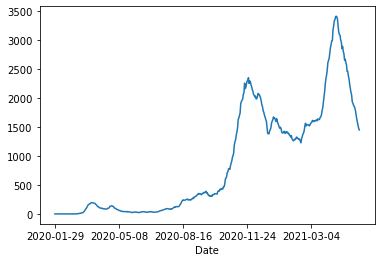

In [5]:
df_new['Cases_Reported_Smoothed'].plot()

In [48]:
from scipy.optimize import curve_fit

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

r = []

In [55]:
df_first_peak_rising = df_new.loc[(df_new.Date > '2020-02-29') & (df_new.Date < '2020-03-22')]

In [56]:
df_first_peak_rising.head()

,Cases_Reported,Cases_Reported_Smoothed,Date
Date,,,
2020-03-01,0,0.87,2020-03-01
2020-03-02,0,0.00,2020-03-02
2020-03-03,15,2.13,2020-03-03
2020-03-04,0,2.13,2020-03-04
2020-03-05,18,4.71,2020-03-05


21


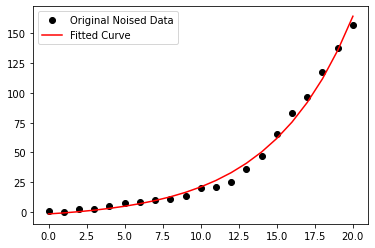

[0.18452916895392962,
 0.10987890515188867,
 0.18452916895392962,
 0.18452916895392962]

In [58]:
import matplotlib.pyplot as plt

y_first_peak_rising = np.array(df_first_peak_rising['Cases_Reported_Smoothed'])
x_first_peak_rising = np.arange(len(y_first_peak_rising))
print(len(y_first_peak_rising))
popt, pcov =curve_fit(func, x_first_peak_rising , y_first_peak_rising ,p0=(4, 0.1,0.2))

plt.figure()
plt.plot(x_first_peak_rising,y_first_peak_rising, 'ko', label="Original Noised Data")
plt.plot(x_first_peak_rising, func(x_first_peak_rising, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

r.append(-popt[1])
r

<ipython-input-33-a12bbd3b83a3>:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


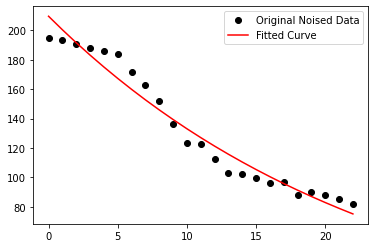

In [37]:
df_first_peak_falling = df_new.loc[(df_new.Date > '2020-03-25') & (df_new.Date < '2020-04-18')]

y_first_peak_falling = np.array(df_first_peak_falling['Cases_Reported_Smoothed'])
x_first_peak_falling = np.arange(len(y_first_peak_falling))
popt, pcov =curve_fit(func, x_first_peak_falling , y_first_peak_falling)


plt.figure()
plt.plot(x_first_peak_falling,y_first_peak_falling, 'ko', label="Original Noised Data")
plt.plot(x_first_peak_falling, func(x_first_peak_falling, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()


r.append(-popt[1])

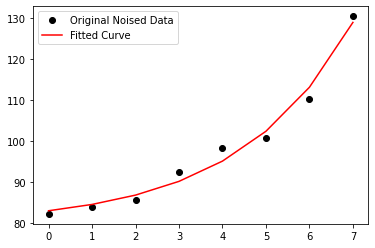

In [38]:
df_second_peak_rising = df_new.loc[(df_new.Date > '2020-04-16') & (df_new.Date < '2020-04-25')]

y_second_peak_rising = np.array(df_second_peak_rising['Cases_Reported_Smoothed'])
x_second_peak_rising = np.arange(len(y_second_peak_rising))
popt, pcov =curve_fit(func, x_second_peak_rising , y_second_peak_rising ,p0=(4, 0.1,0.2))

plt.figure()
plt.plot(x_second_peak_rising,y_second_peak_rising, 'ko', label="Original Noised Data")
plt.plot(x_second_peak_rising, func(x_second_peak_rising, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

r.append(-popt[1])

<ipython-input-33-a12bbd3b83a3>:4: RuntimeWarning: overflow encountered in exp
  return a * np.exp(-b * x) + c


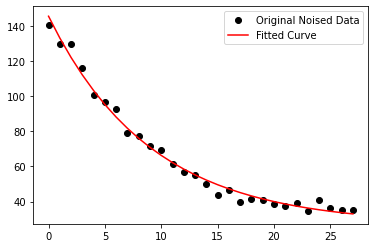

In [39]:
df_second_peak_falling = df_new.loc[(df_new.Date > '2020-04-26') & (df_new.Date < '2020-05-25')]

y_second_peak_falling = np.array(df_second_peak_falling['Cases_Reported_Smoothed'])
x_second_peak_falling = np.arange(len(y_second_peak_falling))
popt, pcov =curve_fit(func, x_second_peak_falling , y_second_peak_falling)

plt.figure()
plt.plot(x_second_peak_falling,y_second_peak_falling, 'ko', label="Original Noised Data")
plt.plot(x_second_peak_falling, func(x_second_peak_falling, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

r.append(-popt[1])

57


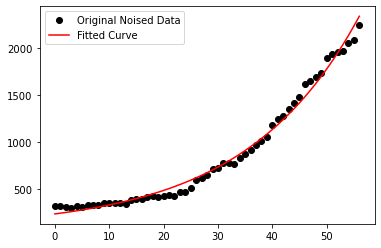

1.3627353042655894


In [60]:
df_third_peak_rising = df_new.loc[(df_new.Date > '2020-09-24') & (df_new.Date < '2020-11-21')]

y_third_peak_rising = np.array(df_third_peak_rising['Cases_Reported_Smoothed'])
x_third_peak_rising = np.arange(len(y_third_peak_rising))
print(len(y_third_peak_rising))


popt, pcov =curve_fit(func, x_third_peak_rising , y_third_peak_rising ,p0=(4, 0.1,0.2))

plt.figure()
plt.plot(x_third_peak_rising,y_third_peak_rising, 'ko', label="Original Noised Data")
plt.plot(x_third_peak_rising, func(x_third_peak_rising, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

R = np.exp(6.5*(-popt[1]))
print(R)
r.append(-popt[1])

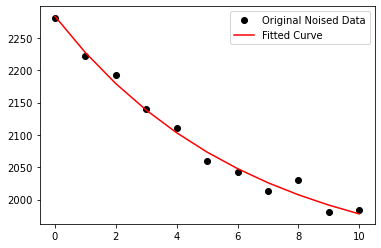

array([3.85265966e+02, 1.57510428e-01, 1.89807151e+03])

In [41]:
df_third_peak_falling_1 = df_new.loc[(df_new.Date > '2020-11-28') & (df_new.Date < '2020-12-10')]

y_third_peak_falling_1 = np.array(df_third_peak_falling_1['Cases_Reported_Smoothed'])
x_third_peak_falling_1 = np.arange(len(y_third_peak_falling_1))

try:
    popt, pcov =curve_fit(func, x_third_peak_falling_1 , y_third_peak_falling_1, p0=(5.5e04, -1.0e-03,-5.2e04))
    r.append(-popt[1])
    
    plt.figure()
    plt.plot(x_third_peak_falling_1,y_third_peak_falling_1, 'ko', label="Original Noised Data")
    plt.plot(x_third_peak_falling_1, func(x_third_peak_falling_1, *popt), 'r-', label="Fitted Curve")
    plt.legend()
    plt.show()
except:
    r.append("")
popt

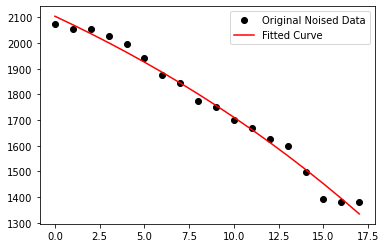

In [42]:
df_third_peak_falling_2 = df_new.loc[(df_new.Date > '2020-12-10') & (df_new.Date < '2020-12-29')]

y_third_peak_falling_2 = np.array(df_third_peak_falling_2['Cases_Reported_Smoothed'])
x_third_peak_falling_2 = np.arange(len(y_third_peak_falling_2))
popt, pcov =curve_fit(func, x_third_peak_falling_2 , y_third_peak_falling_2, p0=(3.8e02, -1.5e-01,1.9e03))

plt.figure()
plt.plot(x_third_peak_falling_2,y_third_peak_falling_2, 'ko', label="Original Noised Data")
plt.plot(x_third_peak_falling_2, func(x_third_peak_falling_2, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

r.append(-popt[1])

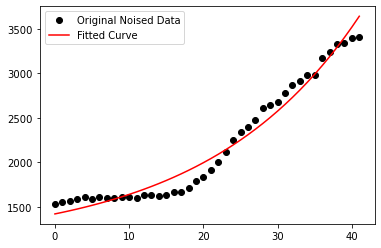

In [43]:
df_fourth_peak_rising = df_new.loc[(df_new.Date > '2021-03-01') & (df_new.Date < '2021-04-13')]

y_fourth_peak_rising = np.array(df_fourth_peak_rising['Cases_Reported_Smoothed'])
x_fourth_peak_rising = np.arange(len(y_fourth_peak_rising))
popt, pcov =curve_fit(func, x_fourth_peak_rising , y_fourth_peak_rising ,p0=(4, 0.1,0.2))

plt.figure()
plt.plot(x_fourth_peak_rising,y_fourth_peak_rising, 'ko', label="Original Noised Data")
plt.plot(x_fourth_peak_rising, func(x_fourth_peak_rising, *popt), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

r.append(-popt[1])

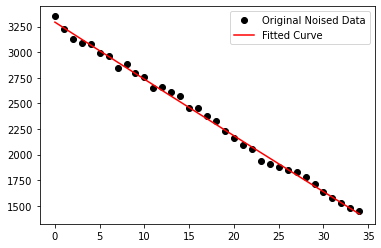

array([ 5.55785150e+04,  1.00852735e-03, -5.22847857e+04])

In [44]:
df_fourth_peak_falling = df_new.loc[(df_new.Date > '2021-04-13')]

y_fourth_peak_falling = np.array(df_fourth_peak_falling['Cases_Reported_Smoothed'])
x_fourth_peak_falling = np.arange(len(y_fourth_peak_falling))

try:
    popt, pcov =curve_fit(func, x_fourth_peak_falling , y_fourth_peak_falling, p0=(1.1e2, -0.01,2.7e1))
    r.append(-popt[1])
    plt.figure()
    plt.plot(x_fourth_peak_falling,y_fourth_peak_falling, 'ko', label="Original Noised Data")
    plt.plot(x_fourth_peak_falling, func(x_fourth_peak_falling, *popt), 'r-', label="Fitted Curve")
    plt.legend()
    plt.show()
except:
    r.append("")
popt

In [45]:
r = np.array(r)
r

array([ 0.18452917, -0.04216402,  0.38792818, -0.11035484,  0.04761445,
       -0.15751043,  0.03693493,  0.04866383, -0.00100853])

In [46]:
R = np.exp(6.5*r)

In [47]:
R

array([ 3.31825684,  0.76028179, 12.44766605,  0.48806509,  1.3627353 ,
        0.35922089,  1.2713471 ,  1.37206227,  0.99346601])